In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys; sys.path.append('..')
from planet.utils.data_utils import random_transforms, tagset_to_ints, TAGS

print('Ready')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Ready


In [4]:
df = pd.read_csv('../data/train_v2.csv')

17
{'clear', 'road', 'haze', 'partly_cloudy', 'agriculture', 'blooming', 'slash_burn', 'conventional_mine', 'selective_logging', 'habitation', 'artisinal_mine', 'blow_down', 'bare_ground', 'water', 'cloudy', 'cultivation', 'primary'}


In [34]:
tag_sets = np.asarray([tagset_to_ints(set(t.strip().split(' '))) for t in df['tags'].values])
print(tag_sets)
print(tag_sets.shape)

[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
(40479, 17)


In [40]:
coccur_matrix = np.dot(tag_sets.transpose(),tag_sets)
print(coccur_matrix)
print(coccur_matrix.shape)

[[ 27  38 225  32  22 190   0  24  49 177 160 189 196 146  65 119 152]
 [ 38  83  40   0   0  51   0   4  18  29   5  27  68 110   6   0  43]
 [225  40  94   3   4 235   0  10  89 163  41  74 171  67  13  10 206]
 [ 32   0   3  76   1  55   0   0  35   4   4  17  76  10   7   2  16]
 [ 22   0   4   1  98  85   0   0   8   3   0  13  98   2   1   2   3]
 [190  51 235  55  85  15   0  70 199  18   0   0  20 151  52 173 126]
 [  0   0   0   0   0   0  41   0   0   0   0   0   0   0   0   0   0]
 [ 24   4  10   0   0  70   0 100   4  36   2  28  94  59   0   0  26]
 [ 49  18  89  35   8 199   0   4 125 127 202 236 103  14  58 126 100]
 [177  29 163   4   3  18   0  36 127  76 129 185 141 226  13  41 147]
 [160   5  41   4   0   0   0   2 202 129 137   0 110 138   5   3 101]
 [189  27  74  17  13   0   0  28 236 185   0  93   7 102  27  33  15]
 [196  68 171  76  98  20   0  94 103 141 110   7 137  48  84 209  89]
 [146 110  67  10   2 151   0  59  14 226 138 102  48 135 151  36  77]
 [ 65 

In [26]:
sys.stdout.write("%20s " % "")
for i in range(0, len(TAGS)):
    sys.stdout.write(" %4s" % TAGS[i][:4])
print()
for i in range(0, len(TAGS)):
    sys.stdout.write("%20s:" % TAGS[i])
    for j in coccur_matrix[i]:
        sys.stdout.write(" %4d" % j)
    print()

                      agri arti bare bloo blow clea clou conv cult habi haze part prim road sele slas wate
         agriculture:   27   38  225   32   22  190    0   24   49  177  160  189  196  146   65  119  152
      artisinal_mine:   38   83   40    0    0   51    0    4   18   29    5   27   68  110    6    0   43
         bare_ground:  225   40   94    3    4  235    0   10   89  163   41   74  171   67   13   10  206
            blooming:   32    0    3   76    1   55    0    0   35    4    4   17   76   10    7    2   16
           blow_down:   22    0    4    1   98   85    0    0    8    3    0   13   98    2    1    2    3
               clear:  190   51  235   55   85   15    0   70  199   18    0    0   20  151   52  173  126
              cloudy:    0    0    0    0    0    0   41    0    0    0    0    0    0    0    0    0    0
   conventional_mine:   24    4   10    0    0   70    0  100    4   36    2   28   94   59    0    0   26
         cultivation:   49   18   89 

In [59]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)
def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu')#, vmin=0.0, vmax=1.0)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(18, 12)

In [44]:
diagonal = np.diagonal(coccur_matrix)
tags_with_counts = ['{0} ({1})'.format(tag, diagonal[i]) for i, tag in enumerate(TAGS)]  
print('tags_with_counts: {0}'.format(tags_with_counts))


tags_with_counts: ['agriculture (27)', 'artisinal_mine (83)', 'bare_ground (94)', 'blooming (76)', 'blow_down (98)', 'clear (15)', 'cloudy (41)', 'conventional_mine (100)', 'cultivation (125)', 'habitation (76)', 'haze (137)', 'partly_cloudy (93)', 'primary (137)', 'road (135)', 'selective_logging (84)', 'slash_burn (209)', 'water (243)']


/home/gbruer/envs/py3ml/lib/python3.5/site-packages/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


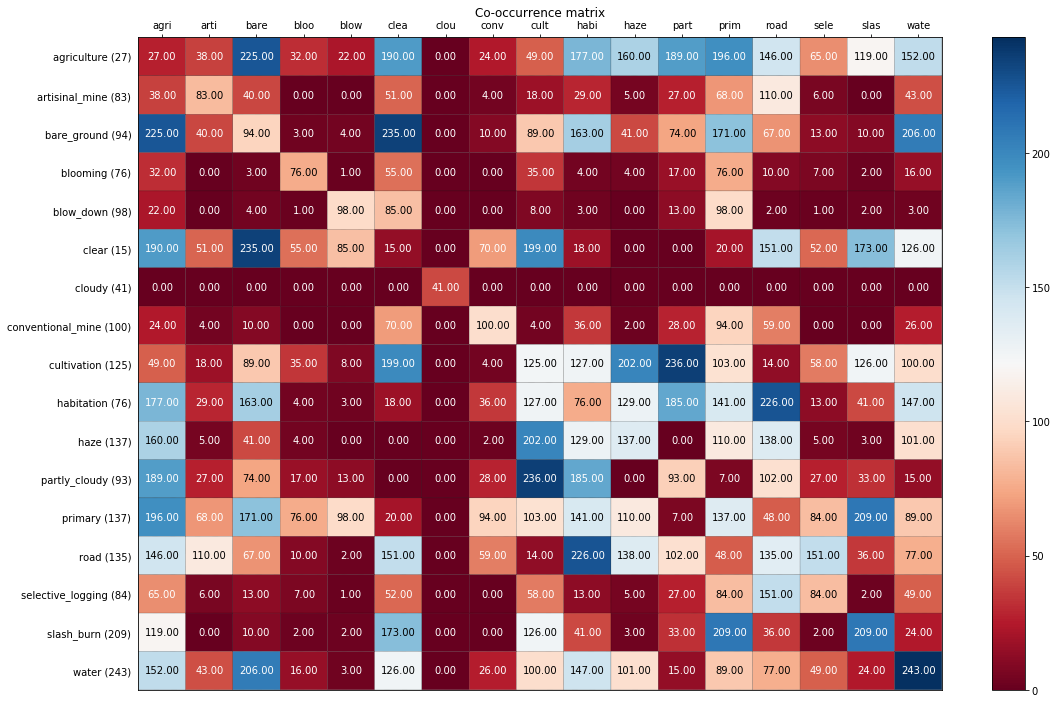

There ya go


In [60]:
# Plotting
x_axis_size = coccur_matrix.shape[0]
y_axis_size = coccur_matrix.shape[1]
title = "Co-occurrence matrix\n"
xlabel= ''#"Labels"
ylabel= ''#"Labels"
xticklabels = [tag[:4] for tag in TAGS]
yticklabels = tags_with_counts
heatmap(coccur_matrix, title, xlabel, ylabel, xticklabels, yticklabels)
plt.show()
print("There ya go")